In [230]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import plt
from datetime import datetime
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

%matplotlib inline

import scipy.stats as stats
import statsmodels.formula.api as smf

In [231]:
magic_data = pd.read_csv("final_scrubbed_data.csv")
magic_data['date'] = pd.to_datetime(magic_data['date'], coerce=True)
magic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9427 entries, 0 to 9426
Data columns (total 10 columns):
supertype       9427 non-null object
archetype       9427 non-null object
archetype_id    9427 non-null int64
arch_count      9427 non-null int64
event_id        9427 non-null int64
deck_rank       9427 non-null int64
mean_rank       9427 non-null float64
top_two         9427 non-null int64
date_num        9427 non-null int64
date            9427 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)

###Step 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [232]:
magic_data.describe()

,archetype_id,arch_count,event_id,deck_rank,mean_rank,top_two,date_num
count,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000
mean,26.528588,487.964039,5993.182773,3.428875,3.428874,0.392065,41553.880238
std,16.117451,329.357267,2073.158264,2.016931,0.197535,0.488237,357.993978
min,1.000000,8.000000,1917.000000,1.000000,2.391304,0.000000,36923.000000
25%,10.000000,186.000000,4301.500000,2.000000,3.352941,0.000000,41307.000000
50%,29.000000,428.000000,6348.000000,3.000000,3.462687,0.000000,41630.000000
75%,38.000000,856.000000,7724.500000,5.000000,3.510664,1.000000,41818.000000
max,51.000000,952.000000,9388.000000,10.000000,4.181818,1.000000,42080.000000


In [167]:
magic_data.head()

,supertype,archetype,archetype_id,arch_count,event_id,deck_rank,mean_rank,top_two,date_num,date
0,Aggro,4/5_C_Good_Stuff,1,59,9149,1,3.237288,1,42055,2015-02-20
1,Aggro,4/5_C_Good_Stuff,1,59,8054,1,3.237288,1,41873,2014-08-22
2,Aggro,4/5_C_Good_Stuff,1,59,7990,1,3.237288,1,41862,2014-08-11
3,Aggro,4/5_C_Good_Stuff,1,59,7635,1,3.237288,1,41770,2014-05-11
4,Aggro,4/5_C_Good_Stuff,1,59,6663,1,3.237288,1,41687,2014-02-17


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002A992908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002B168160>]], dtype=object)

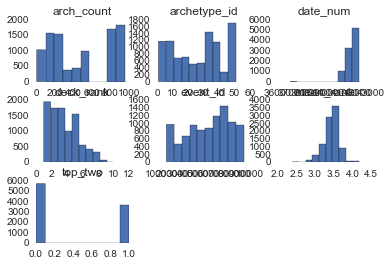

In [168]:
magic_data.hist()

In [169]:
magic_data.columns

Index([u'supertype', u'archetype', u'archetype_id', u'arch_count', u'event_id', u'deck_rank', u'mean_rank', u'top_two', u'date_num', u'date'], dtype='object')

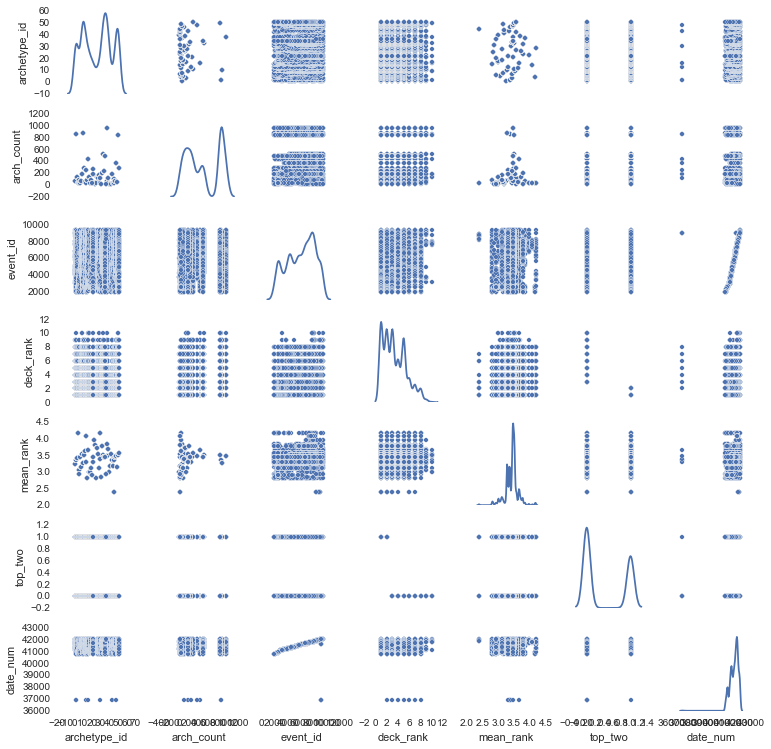

In [170]:
sns.pairplot(magic_data, diag_kind='kde', size=1.5)

###Step2: Build a simple logistic regression and visualize it


In [258]:
model = smf.ols('top_two ~ archetype_id + arch_count + date_num + event_id + mean_rank', data=magic_data)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                top_two   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     33.84
Date:                Tue, 24 Mar 2015   Prob (F-statistic):           2.22e-34
Time:                        18:20:28   Log-Likelihood:                -6533.2
No. Observations:                9427   AIC:                         1.308e+04
Df Residuals:                    9421   BIC:                         1.312e+04
Df Model:                           5                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -0.5805      1.409     -0.412      0.680        -3.343     2.182
archetype_id     0.0005      0.000      1.454      0.146        -0.000     0.001
arch_count   -1.926e-05   1.51e-05     -1.271      0.204      -4.9e-05  1.04e-05
date_num      4.253e-05   3.46e-05      1.228      0.219     -2.53e-05     0.000
event_id     -2.983e-05      6e-06     -4.970      0.000     -4.16e-05 -1.81e-05
mean_rank       -0.1805      0.027     -6.761      0.000        -0.233    -0.128
==============================================================================
Omnibus:                      272.605   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1482.011
Skew:                           0.434   Prob(JB):                         0.00
Kurtosis:                       1.263   Cond. No.                     1.19e+07
==============================================================================

Warnings:
[1] The condition number is large, 1.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [239]:
# create grouped series
grouped = magic_data.groupby('archetype')
df1 = grouped['deck_rank'].mean()
df2 = grouped['deck_rank'].count()

In [254]:
df1

archetype
4/5_C_Good_Stuff      3.237288
Ad_Nauseam            3.845070
Affinity              3.360981
Aura_Hexproof         3.424460
BUG                   3.800000
Bant                  4.176471
Birthing_Pod          3.470588
Bloom_Titan           3.689655
Blue_Moon             3.970588
Boremandos            3.058824
Boros                 2.944444
Delverless_RUG        2.826087
Dredgevine            3.437500
Elemental_Combo       3.000000
Faeries               3.718750
Genesis_Wave          3.190476
Gift_Control          3.552632
Gruul_Aggro           3.147541
Hatebear              3.526882
Hive_Mind             3.550000
Infect                3.352941
Instant_Reanimator    3.193548
Jeskai_Ascendancy     2.391304
Jund                  3.279310
Junk                  3.512027
Living_End            3.367925
Loam                  3.617021
Martyr_Life           3.104294
Merfolk               3.301587
Mono_Black_Control    4.181818
Orzhov_Midrange       4.083333
Other_Aggro           2.81250

In [245]:
# Mean rank by archetype
df2.sort(ascending=False)
df2

archetype
Birthing_Pod          952
Jund                  870
Affinity              856
Twin_Exarch           844
UrzaTron              514
UWx_Midrange          484
Red_Deck_Wins         428
Scapeshift            364
Junk                  291
UR_Storm              280
UR_Aggro              268
Merfolk               252
UW_Control            231
The_Rock              201
Infect                187
Hatebear              186
Zoo                   180
Martyr_Life           163
RUG_Aggro             139
Aura_Hexproof         139
Faeries               128
Bloom_Titan           116
Gift_Control          114
Other_Control         108
Living_End            106
Boremandos             85
Tokens                 80
Other_Aggro            80
Ad_Nauseam             71
Gruul_Aggro            61
4/5_C_Good_Stuff       59
Other_Combo            59
Loam                   47
Sunny_Side_Up          45
Boros                  36
Scepter                36
UB_Delver              35
Bant                   34
Bl

### Step 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables

In [256]:
X = magic_data[[u'archetype_id', u'arch_count', u'event_id', u'date_num', u'mean_rank']]

y = magic_data['top_two']

In [257]:
# instantiate a logistic regression model, and fit with X and y
mod = LogisticRegression()
mod = mod.fit(X, y)

# check the accuracy on the training set
mod.score(X, y)

0.60793465577596262

In [248]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(mod.coef_)))

,0,1
0,archetype_id,"[-6.61141170906e-05, 2.39534753869e-06, -1.907..."
1,arch_count,"[-4.73866088365e-05, -7.9486259858e-05, -5.007..."
2,event_id,"[-6.77647455923e-05, -9.21054882465e-05, -4.74..."
3,date_num,"[-2.21539821668e-05, -2.17006592237e-05, -3.53..."
4,mean_rank,"[-3.74612233229e-06, -2.0125618903e-07, -4.582..."


In [249]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=12)
mod2 = LogisticRegression()
mod2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [255]:
# predict class labels for the test set
predicted = mod2.predict(X_test)
print predicted

[1 2 3 ..., 3 2 2]


In [197]:
# generate class probabilities
probs = mod2.predict_proba(X_test)
print probs

[[ 0.54824138  0.45175862]
 [ 0.59448994  0.40551006]
 [ 0.66048256  0.33951744]
 ..., 
 [ 0.59984857  0.40015143]
 [ 0.70814858  0.29185142]
 [ 0.66637991  0.33362009]]


In [198]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.608695652174
0.549312755205


###Step 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [203]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.61228814  0.59278897  0.60763521  0.60657476  0.58854719  0.60233298
  0.60828025  0.60828025  0.6104034   0.61146497]
0.604859611955


### Step 5: Evaluate Feature Importance

In [209]:
logit = smf.Logit(y, X)

In [210]:
results=logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.660868
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                top_two   No. Observations:                 9427
Model:                          Logit   Df Residuals:                     9422
Method:                           MLE   Df Model:                            4
Date:                Mon, 23 Mar 2015   Pseudo R-squ.:                 0.01313
Time:                        17:58:00   Log-Likelihood:                -6230.0
converged:                       True   LL-Null:                       -6312.9
                                        LLR p-value:                 8.244e-35
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
archetype_id     0.0021      0.001      1.512      0.131        -0.001     0.005
arch_count   -7.149e-05   6.45e-05     -1.108      0.268        -0.000   5.5e-05
event_id        -0.0001   1.05e-05    -10.264      0.000        -0.000 -8.74e-05
date_num      6.799e-05    9.3e-06      7.313      0.000      4.98e-05  8.62e-05
mean_rank       -0.7709      0.115     -6.729      0.000        -0.995    -0.546
================================================================================
"""

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [211]:
def plot_roc_curve(y_test, probs, categories):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    for pos_label, category in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(y_test, probs[:, pos_label], pos_label)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='{} ROC curve (area = {:.3f})'.format(category, roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

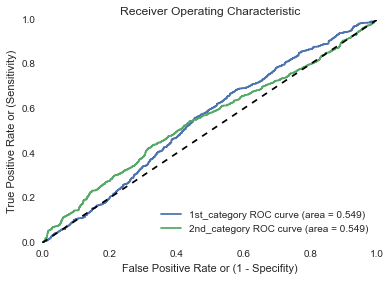

In [213]:
categories = [ '1st_category', '2nd_category']

plot_roc_curve(y_test, probs, categories)

In [215]:
# predict class labels for the test set
predicted = mod2.predict(X_test)
print predicted

[0 0 0 ..., 0 0 0]


In [216]:
# generate class probabilities
probs = mod2.predict_proba(X_test)
print probs

[[ 0.54824138  0.45175862]
 [ 0.59448994  0.40551006]
 [ 0.66048256  0.33951744]
 ..., 
 [ 0.59984857  0.40015143]
 [ 0.70814858  0.29185142]
 [ 0.66637991  0.33362009]]


In [217]:
probs[1]

array([ 0.59448994,  0.40551006])